In [1]:
import pandas as pd
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option("display.max_columns", 999)

In [2]:
%%time
df = pd.read_csv("./input/dataAll.csv", index_col=0)
df = df.drop(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'to_station_name', 'time_key', 'latitude_y', 'longitude_y', 'time', 'unix_secs', 'daily_time'], axis=1)
df.shape

<string>:2: DtypeWarning: Columns (42,65) have mixed types. Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.5/dist-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


CPU times: user 23.6 s, sys: 2.21 s, total: 25.8 s
Wall time: 25.8 s


In [3]:
df.head()

,from_station_name,usertype,gender,birthyear,start_year,start_month,start_day,start_hour,start_weekday,latitude_x,longitude_x,distance,apparentTemperature,cloudCover,daily_apparentTemperatureHigh,daily_apparentTemperatureHighTime,daily_apparentTemperatureLow,daily_apparentTemperatureLowTime,daily_apparentTemperatureMax,daily_apparentTemperatureMaxTime,daily_apparentTemperatureMin,daily_apparentTemperatureMinTime,daily_cloudCover,daily_dewPoint,daily_humidity,daily_icon,daily_moonPhase,daily_precipAccumulation,daily_precipIntensity,daily_precipIntensityMax,daily_precipIntensityMaxTime,daily_precipProbability,daily_precipType,daily_pressure,daily_summary,daily_sunriseTime,daily_sunsetTime,daily_temperatureHigh,daily_temperatureHighTime,daily_temperatureLow,daily_temperatureLowTime,daily_temperatureMax,daily_temperatureMaxTime,daily_temperatureMin,daily_temperatureMinTime,daily_visibility,daily_windBearing,daily_windSpeed,dewPoint,humidity,icon,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,visibility,windBearing,windSpeed
0,Damen Ave & Pierce Ave,Subscriber,Male,1988.0,2016,9,30,23,4,41.909396,-87.677692,0.790537,61.74,NaN,63.73,1.475262e+09,59.89,1.475327e+09,63.73,1.475262e+09,60.7,1.475219e+09,1.0,58.95,0.9,partly-cloudy-night,0.99,NaN,0.0053,0.0304,1.475248e+09,0.77,rain,1019.44,Partly cloudy overnight.,1.475236e+09,1.475279e+09,63.62,1.475262e+09,59.8,1.475327e+09,63.62,1.475262e+09,60.55,1.475219e+09,8.79,43.0,14.08,58.41,0.89,clear-night,NaN,0.0,0.0,NaN,1017.27,Clear,61.69,10.0,65.0,9.64
1,Ashland Ave & Harrison St,Subscriber,Female,1990.0,2016,9,30,23,4,41.874291,-87.667246,0.531053,61.74,NaN,63.73,1.475262e+09,59.89,1.475327e+09,63.73,1.475262e+09,60.7,1.475219e+09,1.0,58.95,0.9,partly-cloudy-night,0.99,NaN,0.0053,0.0304,1.475248e+09,0.77,rain,1019.44,Partly cloudy overnight.,1.475236e+09,1.475279e+09,63.62,1.475262e+09,59.8,1.475327e+09,63.62,1.475262e+09,60.55,1.475219e+09,8.79,43.0,14.08,58.41,0.89,clear-night,NaN,0.0,0.0,NaN,1017.27,Clear,61.69,10.0,65.0,9.64
2,Sheffield Ave & Wrightwood Ave,Customer,NaN,NaN,2016,9,30,23,4,41.928712,-87.653833,1.808217,61.74,NaN,63.73,1.475262e+09,59.89,1.475327e+09,63.73,1.475262e+09,60.7,1.475219e+09,1.0,58.95,0.9,partly-cloudy-night,0.99,NaN,0.0053,0.0304,1.475248e+09,0.77,rain,1019.44,Partly cloudy overnight.,1.475236e+09,1.475279e+09,63.62,1.475262e+09,59.8,1.475327e+09,63.62,1.475262e+09,60.55,1.475219e+09,8.79,43.0,14.08,58.41,0.89,clear-night,NaN,0.0,0.0,NaN,1017.27,Clear,61.69,10.0,65.0,9.64
3,Washtenaw Ave & Lawrence Ave,Subscriber,Female,1988.0,2016,9,30,23,4,41.968711,-87.696170,0.883412,61.74,NaN,63.73,1.475262e+09,59.89,1.475327e+09,63.73,1.475262e+09,60.7,1.475219e+09,1.0,58.95,0.9,partly-cloudy-night,0.99,NaN,0.0053,0.0304,1.475248e+09,0.77,rain,1019.44,Partly cloudy overnight.,1.475236e+09,1.475279e+09,63.62,1.475262e+09,59.8,1.475327e+09,63.62,1.475262e+09,60.55,1.475219e+09,8.79,43.0,14.08,58.41,0.89,clear-night,NaN,0.0,0.0,NaN,1017.27,Clear,61.69,10.0,65.0,9.64
4,Sheffield Ave & Wrightwood Ave,Customer,NaN,NaN,2016,9,30,23,4,41.928712,-87.653833,3.157172,61.74,NaN,63.73,1.475262e+09,59.89,1.475327e+09,63.73,1.475262e+09,60.7,1.475219e+09,1.0,58.95,0.9,partly-cloudy-night,0.99,NaN,0.0053,0.0304,1.475248e+09,0.77,rain,1019.44,Partly cloudy overnight.,1.475236e+09,1.475279e+09,63.62,1.475262e+09,59.8,1.475327e+09,63.62,1.475262e+09,60.55,1.475219e+09,8.79,43.0,14.08,58.41,0.89,clear-night,NaN,0.0,0.0,NaN,1017.27,Clear,61.69,10.0,65.0,9.64


In [4]:
categorical_colName = ['from_station_name', 'usertype', 'gender', 'start_year', 'daily_icon', 'daily_precipType', 'daily_summary', 'icon', 'precipType', 'summary']

## Manage Column Types & Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['start_year', 'start_month', 'start_day', 'start_hour',
        'start_weekday'],
       dtype='object'),
 dtype('float64'): Index(['birthyear', 'latitude_x', 'longitude_x', 'distance',
        'apparentTemperature', 'cloudCover', 'daily_apparentTemperatureHigh',
        'daily_apparentTemperatureHighTime', 'daily_apparentTemperatureLow',
        'daily_apparentTemperatureLowTime', 'daily_apparentTemperatureMax',
        'daily_apparentTemperatureMaxTime', 'daily_apparentTemperatureMin',
        'daily_apparentTemperatureMinTime', 'daily_cloudCover',
        'daily_dewPoint', 'daily_humidity', 'daily_moonPhase',
        'daily_precipAccumulation', 'daily_precipIntensity',
        'daily_precipIntensityMax', 'daily_precipIntensityMaxTime',
        'daily_precipProbability', 'daily_pressure', 'daily_sunriseTime',
        'daily_sunsetTime', 'daily_temperatureHigh',
        'daily_temperatureHighTime', 'daily_temperatureLow',
        'daily_temperatureLowTime', 'da

In [7]:
LabelMap = dict()
for i in df.select_dtypes('O').columns.tolist():
    print('Start ' + i)
    df[i] = df[i].fillna('missing')
    le = LabelEncoder()
    le.fit(df[i])
    LabelMap[i] = dict(zip(le.classes_, le.transform(le.classes_)))

Start from_station_name
Start usertype
Start gender
Start daily_icon
Start daily_precipType
Start daily_summary
Start icon
Start precipType
Start summary


In [8]:
for i in LabelMap:
    LabelMap[i]['missing'] = np.nan

LabelMap

{'daily_icon': {'clear-day': 0,
  'fog': 1,
  'missing': nan,
  'partly-cloudy-day': 3,
  'partly-cloudy-night': 4,
  'rain': 5,
  'snow': 6,
  'wind': 7},
 'daily_precipType': {'missing': nan, 'rain': 1, 'snow': 2},
 'daily_summary': {'Breezy and partly cloudy in the morning.': 0,
  'Breezy and partly cloudy overnight.': 1,
  'Breezy and partly cloudy starting in the afternoon, continuing until evening.': 2,
  'Breezy and partly cloudy until evening.': 3,
  'Breezy in the afternoon and partly cloudy overnight.': 4,
  'Breezy in the afternoon and partly cloudy starting in the afternoon, continuing until evening.': 5,
  'Breezy in the afternoon.': 6,
  'Breezy in the morning and humid throughout the day.': 7,
  'Breezy in the morning and light rain in the evening.': 8,
  'Breezy in the morning and partly cloudy starting in the afternoon, continuing until evening.': 9,
  'Breezy in the morning and partly cloudy starting in the evening.': 10,
  'Breezy in the morning and partly cloudy unt

In [9]:
%time df.replace(LabelMap, inplace=True)

CPU times: user 1min 15s, sys: 213 ms, total: 1min 15s
Wall time: 1min 15s


## Calculate Hour Info from daily_temperature[High/Low/Max/Min]

In [10]:
[x for x in df.columns.tolist() if 'Time' in x]

['daily_apparentTemperatureHighTime',
 'daily_apparentTemperatureLowTime',
 'daily_apparentTemperatureMaxTime',
 'daily_apparentTemperatureMinTime',
 'daily_precipIntensityMaxTime',
 'daily_sunriseTime',
 'daily_sunsetTime',
 'daily_temperatureHighTime',
 'daily_temperatureLowTime',
 'daily_temperatureMaxTime',
 'daily_temperatureMinTime']

In [11]:
import datetime
import pytz

time_delta = datetime.timedelta(hours=-5)

In [12]:
%%time
for i in [x for x in df.columns.tolist() if 'Time' in x]:
    notNA_index = df[i].notna()
    df[i.replace('Time', 'Hour')] = np.nan
    df[i.replace('Time', 'Hour')][notNA_index] = df[i][notNA_index].apply(lambda x: (pytz.UTC.localize(datetime.datetime.fromtimestamp(x)) + time_delta).hour)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


CPU times: user 1min 40s, sys: 36.5 s, total: 2min 17s
Wall time: 2min 17s


In [13]:
# delete time columns
df.drop([x for x in df.columns.tolist() if 'Time' in x], axis=1, inplace=True)
df.head()

,from_station_name,usertype,gender,birthyear,start_year,start_month,start_day,start_hour,start_weekday,latitude_x,longitude_x,distance,apparentTemperature,cloudCover,daily_apparentTemperatureHigh,daily_apparentTemperatureLow,daily_apparentTemperatureMax,daily_apparentTemperatureMin,daily_cloudCover,daily_dewPoint,daily_humidity,daily_icon,daily_moonPhase,daily_precipAccumulation,daily_precipIntensity,daily_precipIntensityMax,daily_precipProbability,daily_precipType,daily_pressure,daily_summary,daily_temperatureHigh,daily_temperatureLow,daily_temperatureMax,daily_temperatureMin,daily_visibility,daily_windBearing,daily_windSpeed,dewPoint,humidity,icon,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,visibility,windBearing,windSpeed,daily_apparentTemperatureHighHour,daily_apparentTemperatureLowHour,daily_apparentTemperatureMaxHour,daily_apparentTemperatureMinHour,daily_precipIntensityMaxHour,daily_sunriseHour,daily_sunsetHour,daily_temperatureHighHour,daily_temperatureLowHour,daily_temperatureMaxHour,daily_temperatureMinHour
0,176,2,1.0,1988.0,2016,9,30,23,4,41.909396,-87.677692,0.790537,61.74,NaN,63.73,59.89,63.73,60.7,1.0,58.95,0.9,4.0,0.99,NaN,0.0053,0.0304,0.77,1.0,1019.44,75.0,63.62,59.8,63.62,60.55,8.79,43.0,14.08,58.41,0.89,1.0,NaN,0.0,0.0,NaN,1017.27,6.0,61.69,10.0,65.0,9.64,10.0,4.0,10.0,22.0,6.0,2.0,14.0,10.0,4.0,10.0,22.0
1,26,2,0.0,1990.0,2016,9,30,23,4,41.874291,-87.667246,0.531053,61.74,NaN,63.73,59.89,63.73,60.7,1.0,58.95,0.9,4.0,0.99,NaN,0.0053,0.0304,0.77,1.0,1019.44,75.0,63.62,59.8,63.62,60.55,8.79,43.0,14.08,58.41,0.89,1.0,NaN,0.0,0.0,NaN,1017.27,6.0,61.69,10.0,65.0,9.64,10.0,4.0,10.0,22.0,6.0,2.0,14.0,10.0,4.0,10.0,22.0
2,475,0,NaN,NaN,2016,9,30,23,4,41.928712,-87.653833,1.808217,61.74,NaN,63.73,59.89,63.73,60.7,1.0,58.95,0.9,4.0,0.99,NaN,0.0053,0.0304,0.77,1.0,1019.44,75.0,63.62,59.8,63.62,60.55,8.79,43.0,14.08,58.41,0.89,1.0,NaN,0.0,0.0,NaN,1017.27,6.0,61.69,10.0,65.0,9.64,10.0,4.0,10.0,22.0,6.0,2.0,14.0,10.0,4.0,10.0,22.0
3,552,2,0.0,1988.0,2016,9,30,23,4,41.968711,-87.696170,0.883412,61.74,NaN,63.73,59.89,63.73,60.7,1.0,58.95,0.9,4.0,0.99,NaN,0.0053,0.0304,0.77,1.0,1019.44,75.0,63.62,59.8,63.62,60.55,8.79,43.0,14.08,58.41,0.89,1.0,NaN,0.0,0.0,NaN,1017.27,6.0,61.69,10.0,65.0,9.64,10.0,4.0,10.0,22.0,6.0,2.0,14.0,10.0,4.0,10.0,22.0
4,475,0,NaN,NaN,2016,9,30,23,4,41.928712,-87.653833,3.157172,61.74,NaN,63.73,59.89,63.73,60.7,1.0,58.95,0.9,4.0,0.99,NaN,0.0053,0.0304,0.77,1.0,1019.44,75.0,63.62,59.8,63.62,60.55,8.79,43.0,14.08,58.41,0.89,1.0,NaN,0.0,0.0,NaN,1017.27,6.0,61.69,10.0,65.0,9.64,10.0,4.0,10.0,22.0,6.0,2.0,14.0,10.0,4.0,10.0,22.0


## Train Validation Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
%%time
train, test = train_test_split(df, test_size=.2, train_size=.8, stratify=df['start_month'].tolist(), random_state=0)

CPU times: user 3.67 s, sys: 464 ms, total: 4.14 s
Wall time: 4.13 s


In [16]:
%%time
train, validation = train_test_split(train, test_size=.25, train_size=.75, stratify=train['start_month'].tolist(), random_state=0)

CPU times: user 2.9 s, sys: 372 ms, total: 3.27 s
Wall time: 3.27 s


In [17]:
print(train.shape, validation.shape, test.shape)

(2206252, 61) (735418, 61) (735418, 61)


## Microsoft LightGBM Model

In [18]:
import lightgbm as lgb
import json
from sklearn.metrics import mean_squared_error

In [19]:
%%time
def generate_model_input(df):
    '''return format: X_train, y_train'''
    keep_col = df.columns.tolist()
    keep_col.remove('distance')
    
    return df[keep_col], (df['distance'] < 2.0).tolist()

# create input data
X_train, y_train = generate_model_input(train)
X_valid, y_valid = generate_model_input(validation)
X_test, y_test = generate_model_input(test)

CPU times: user 279 ms, sys: 305 ms, total: 584 ms
Wall time: 582 ms


In [20]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

## Model Training

In [21]:
categorical_colName

['from_station_name',
 'usertype',
 'gender',
 'start_year',
 'daily_icon',
 'daily_precipType',
 'daily_summary',
 'icon',
 'precipType',
 'summary']

In [22]:
%%time
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 50,
    'max_bin': 255,
    'learning_rate': 0.05,
    'verbose': 0,
    'num_threads':8
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                categorical_feature = categorical_colName,
                num_boost_round=5000,
                valid_sets=lgb_eval)

print('Save model...')
# save model to file
gbm.save_model('lgb_model.txt')

Start training...


/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:1029: UserWarning: categorical_feature in Dataset is overrided. New categorical_feature is ['daily_icon', 'daily_precipType', 'daily_summary', 'from_station_name', 'gender', 'icon', 'precipType', 'start_year', 'summary', 'usertype']
  warnings.warn('categorical_feature in Dataset is overrided. New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:668: UserWarning: categorical_feature in param dict is overrided.
  warnings.warn('categorical_feature in param dict is overrided.')


[1]	valid_0's binary_logloss: 0.684969	valid_0's auc: 0.691237
[2]	valid_0's binary_logloss: 0.677567	valid_0's auc: 0.693731
[3]	valid_0's binary_logloss: 0.670959	valid_0's auc: 0.694693
[4]	valid_0's binary_logloss: 0.664809	valid_0's auc: 0.695697
[5]	valid_0's binary_logloss: 0.659246	valid_0's auc: 0.696303
[6]	valid_0's binary_logloss: 0.654242	valid_0's auc: 0.697032
[7]	valid_0's binary_logloss: 0.649649	valid_0's auc: 0.697355
[8]	valid_0's binary_logloss: 0.645409	valid_0's auc: 0.697655
[9]	valid_0's binary_logloss: 0.641577	valid_0's auc: 0.697995
[10]	valid_0's binary_logloss: 0.638099	valid_0's auc: 0.697953
[11]	valid_0's binary_logloss: 0.634834	valid_0's auc: 0.69832
[12]	valid_0's binary_logloss: 0.631808	valid_0's auc: 0.698797
[13]	valid_0's binary_logloss: 0.629027	valid_0's auc: 0.699183
[14]	valid_0's binary_logloss: 0.62645	valid_0's auc: 0.699735
[15]	valid_0's binary_logloss: 0.62405	valid_0's auc: 0.700229
[16]	valid_0's binary_logloss: 0.621911	valid_0's au

[130]	valid_0's binary_logloss: 0.57981	valid_0's auc: 0.726989
[131]	valid_0's binary_logloss: 0.579673	valid_0's auc: 0.727177
[132]	valid_0's binary_logloss: 0.57956	valid_0's auc: 0.727339
[133]	valid_0's binary_logloss: 0.579491	valid_0's auc: 0.727437
[134]	valid_0's binary_logloss: 0.57945	valid_0's auc: 0.727508
[135]	valid_0's binary_logloss: 0.579439	valid_0's auc: 0.727518
[136]	valid_0's binary_logloss: 0.579336	valid_0's auc: 0.72767
[137]	valid_0's binary_logloss: 0.57921	valid_0's auc: 0.72784
[138]	valid_0's binary_logloss: 0.579121	valid_0's auc: 0.727964
[139]	valid_0's binary_logloss: 0.57902	valid_0's auc: 0.728109
[140]	valid_0's binary_logloss: 0.578991	valid_0's auc: 0.728149
[141]	valid_0's binary_logloss: 0.578798	valid_0's auc: 0.728414
[142]	valid_0's binary_logloss: 0.578772	valid_0's auc: 0.728444
[143]	valid_0's binary_logloss: 0.57869	valid_0's auc: 0.728561
[144]	valid_0's binary_logloss: 0.578629	valid_0's auc: 0.72864
[145]	valid_0's binary_logloss: 0.

[257]	valid_0's binary_logloss: 0.572664	valid_0's auc: 0.736478
[258]	valid_0's binary_logloss: 0.572662	valid_0's auc: 0.73648
[259]	valid_0's binary_logloss: 0.572544	valid_0's auc: 0.736629
[260]	valid_0's binary_logloss: 0.572482	valid_0's auc: 0.736712
[261]	valid_0's binary_logloss: 0.572471	valid_0's auc: 0.736724
[262]	valid_0's binary_logloss: 0.572435	valid_0's auc: 0.736769
[263]	valid_0's binary_logloss: 0.57243	valid_0's auc: 0.736774
[264]	valid_0's binary_logloss: 0.572416	valid_0's auc: 0.736794
[265]	valid_0's binary_logloss: 0.572311	valid_0's auc: 0.736942
[266]	valid_0's binary_logloss: 0.572309	valid_0's auc: 0.736942
[267]	valid_0's binary_logloss: 0.572299	valid_0's auc: 0.736958
[268]	valid_0's binary_logloss: 0.572249	valid_0's auc: 0.737025
[269]	valid_0's binary_logloss: 0.572152	valid_0's auc: 0.737168
[270]	valid_0's binary_logloss: 0.572135	valid_0's auc: 0.737189
[271]	valid_0's binary_logloss: 0.572106	valid_0's auc: 0.737228
[272]	valid_0's binary_logl

[384]	valid_0's binary_logloss: 0.568738	valid_0's auc: 0.741522
[385]	valid_0's binary_logloss: 0.568732	valid_0's auc: 0.741528
[386]	valid_0's binary_logloss: 0.568731	valid_0's auc: 0.74153
[387]	valid_0's binary_logloss: 0.568726	valid_0's auc: 0.741535
[388]	valid_0's binary_logloss: 0.568718	valid_0's auc: 0.741543
[389]	valid_0's binary_logloss: 0.568718	valid_0's auc: 0.741543
[390]	valid_0's binary_logloss: 0.568717	valid_0's auc: 0.741542
[391]	valid_0's binary_logloss: 0.568701	valid_0's auc: 0.741559
[392]	valid_0's binary_logloss: 0.568685	valid_0's auc: 0.741581
[393]	valid_0's binary_logloss: 0.568678	valid_0's auc: 0.741589
[394]	valid_0's binary_logloss: 0.568658	valid_0's auc: 0.741613
[395]	valid_0's binary_logloss: 0.568655	valid_0's auc: 0.741616
[396]	valid_0's binary_logloss: 0.568562	valid_0's auc: 0.741744
[397]	valid_0's binary_logloss: 0.568553	valid_0's auc: 0.741751
[398]	valid_0's binary_logloss: 0.568477	valid_0's auc: 0.741853
[399]	valid_0's binary_log

[512]	valid_0's binary_logloss: 0.566672	valid_0's auc: 0.743968
[513]	valid_0's binary_logloss: 0.566668	valid_0's auc: 0.743975
[514]	valid_0's binary_logloss: 0.566667	valid_0's auc: 0.743975
[515]	valid_0's binary_logloss: 0.56664	valid_0's auc: 0.744009
[516]	valid_0's binary_logloss: 0.566635	valid_0's auc: 0.744016
[517]	valid_0's binary_logloss: 0.56663	valid_0's auc: 0.74402
[518]	valid_0's binary_logloss: 0.56657	valid_0's auc: 0.744097
[519]	valid_0's binary_logloss: 0.566566	valid_0's auc: 0.744101
[520]	valid_0's binary_logloss: 0.566553	valid_0's auc: 0.74412
[521]	valid_0's binary_logloss: 0.56655	valid_0's auc: 0.744122
[522]	valid_0's binary_logloss: 0.566522	valid_0's auc: 0.744166
[523]	valid_0's binary_logloss: 0.566516	valid_0's auc: 0.744173
[524]	valid_0's binary_logloss: 0.566474	valid_0's auc: 0.744227
[525]	valid_0's binary_logloss: 0.566469	valid_0's auc: 0.744232
[526]	valid_0's binary_logloss: 0.566435	valid_0's auc: 0.744274
[527]	valid_0's binary_logloss:

[640]	valid_0's binary_logloss: 0.564188	valid_0's auc: 0.746936
[641]	valid_0's binary_logloss: 0.564142	valid_0's auc: 0.746994
[642]	valid_0's binary_logloss: 0.564127	valid_0's auc: 0.747011
[643]	valid_0's binary_logloss: 0.56411	valid_0's auc: 0.747033
[644]	valid_0's binary_logloss: 0.564105	valid_0's auc: 0.747038
[645]	valid_0's binary_logloss: 0.564027	valid_0's auc: 0.747147
[646]	valid_0's binary_logloss: 0.563889	valid_0's auc: 0.747325
[647]	valid_0's binary_logloss: 0.563884	valid_0's auc: 0.747332
[648]	valid_0's binary_logloss: 0.563884	valid_0's auc: 0.747331
[649]	valid_0's binary_logloss: 0.563878	valid_0's auc: 0.747337
[650]	valid_0's binary_logloss: 0.563878	valid_0's auc: 0.747337
[651]	valid_0's binary_logloss: 0.563863	valid_0's auc: 0.747354
[652]	valid_0's binary_logloss: 0.563862	valid_0's auc: 0.747353
[653]	valid_0's binary_logloss: 0.56386	valid_0's auc: 0.747356
[654]	valid_0's binary_logloss: 0.563835	valid_0's auc: 0.747391
[655]	valid_0's binary_logl

[767]	valid_0's binary_logloss: 0.562458	valid_0's auc: 0.749043
[768]	valid_0's binary_logloss: 0.562455	valid_0's auc: 0.749046
[769]	valid_0's binary_logloss: 0.562435	valid_0's auc: 0.749077
[770]	valid_0's binary_logloss: 0.562435	valid_0's auc: 0.749077
[771]	valid_0's binary_logloss: 0.562426	valid_0's auc: 0.749089
[772]	valid_0's binary_logloss: 0.562425	valid_0's auc: 0.749089
[773]	valid_0's binary_logloss: 0.562426	valid_0's auc: 0.749088
[774]	valid_0's binary_logloss: 0.562417	valid_0's auc: 0.749099
[775]	valid_0's binary_logloss: 0.562412	valid_0's auc: 0.749105
[776]	valid_0's binary_logloss: 0.562404	valid_0's auc: 0.749111
[777]	valid_0's binary_logloss: 0.562383	valid_0's auc: 0.749136
[778]	valid_0's binary_logloss: 0.562381	valid_0's auc: 0.749137
[779]	valid_0's binary_logloss: 0.562381	valid_0's auc: 0.749138
[780]	valid_0's binary_logloss: 0.562373	valid_0's auc: 0.749148
[781]	valid_0's binary_logloss: 0.562288	valid_0's auc: 0.749236
[782]	valid_0's binary_lo

[895]	valid_0's binary_logloss: 0.560272	valid_0's auc: 0.751647
[896]	valid_0's binary_logloss: 0.560271	valid_0's auc: 0.751648
[897]	valid_0's binary_logloss: 0.560266	valid_0's auc: 0.751654
[898]	valid_0's binary_logloss: 0.560265	valid_0's auc: 0.751655
[899]	valid_0's binary_logloss: 0.560265	valid_0's auc: 0.751654
[900]	valid_0's binary_logloss: 0.560249	valid_0's auc: 0.751673
[901]	valid_0's binary_logloss: 0.560197	valid_0's auc: 0.751743
[902]	valid_0's binary_logloss: 0.560185	valid_0's auc: 0.751758
[903]	valid_0's binary_logloss: 0.560184	valid_0's auc: 0.751758
[904]	valid_0's binary_logloss: 0.560164	valid_0's auc: 0.751783
[905]	valid_0's binary_logloss: 0.560163	valid_0's auc: 0.751783
[906]	valid_0's binary_logloss: 0.560145	valid_0's auc: 0.751802
[907]	valid_0's binary_logloss: 0.560092	valid_0's auc: 0.751865
[908]	valid_0's binary_logloss: 0.560073	valid_0's auc: 0.751889
[909]	valid_0's binary_logloss: 0.560055	valid_0's auc: 0.75191
[910]	valid_0's binary_log

[1023]	valid_0's binary_logloss: 0.558748	valid_0's auc: 0.753444
[1024]	valid_0's binary_logloss: 0.558747	valid_0's auc: 0.753445
[1025]	valid_0's binary_logloss: 0.558746	valid_0's auc: 0.753445
[1026]	valid_0's binary_logloss: 0.558747	valid_0's auc: 0.753444
[1027]	valid_0's binary_logloss: 0.558746	valid_0's auc: 0.753445
[1028]	valid_0's binary_logloss: 0.558745	valid_0's auc: 0.753446
[1029]	valid_0's binary_logloss: 0.558746	valid_0's auc: 0.753444
[1030]	valid_0's binary_logloss: 0.558747	valid_0's auc: 0.753441
[1031]	valid_0's binary_logloss: 0.558746	valid_0's auc: 0.753442
[1032]	valid_0's binary_logloss: 0.558747	valid_0's auc: 0.75344
[1033]	valid_0's binary_logloss: 0.558742	valid_0's auc: 0.753445
[1034]	valid_0's binary_logloss: 0.558741	valid_0's auc: 0.753447
[1035]	valid_0's binary_logloss: 0.558719	valid_0's auc: 0.753471
[1036]	valid_0's binary_logloss: 0.55872	valid_0's auc: 0.75347
[1037]	valid_0's binary_logloss: 0.558715	valid_0's auc: 0.753473
[1038]	valid_

[1148]	valid_0's binary_logloss: 0.558277	valid_0's auc: 0.75395
[1149]	valid_0's binary_logloss: 0.558278	valid_0's auc: 0.753947
[1150]	valid_0's binary_logloss: 0.558235	valid_0's auc: 0.753995
[1151]	valid_0's binary_logloss: 0.558187	valid_0's auc: 0.754032
[1152]	valid_0's binary_logloss: 0.558171	valid_0's auc: 0.754051
[1153]	valid_0's binary_logloss: 0.558159	valid_0's auc: 0.754065
[1154]	valid_0's binary_logloss: 0.558109	valid_0's auc: 0.75411
[1155]	valid_0's binary_logloss: 0.558092	valid_0's auc: 0.754127
[1156]	valid_0's binary_logloss: 0.558091	valid_0's auc: 0.754128
[1157]	valid_0's binary_logloss: 0.558081	valid_0's auc: 0.754142
[1158]	valid_0's binary_logloss: 0.558068	valid_0's auc: 0.754162
[1159]	valid_0's binary_logloss: 0.558042	valid_0's auc: 0.754193
[1160]	valid_0's binary_logloss: 0.558035	valid_0's auc: 0.754202
[1161]	valid_0's binary_logloss: 0.558023	valid_0's auc: 0.754219
[1162]	valid_0's binary_logloss: 0.557999	valid_0's auc: 0.754248
[1163]	valid

[1274]	valid_0's binary_logloss: 0.557091	valid_0's auc: 0.755284
[1275]	valid_0's binary_logloss: 0.557091	valid_0's auc: 0.755285
[1276]	valid_0's binary_logloss: 0.557088	valid_0's auc: 0.755289
[1277]	valid_0's binary_logloss: 0.557088	valid_0's auc: 0.755287
[1278]	valid_0's binary_logloss: 0.557087	valid_0's auc: 0.755288
[1279]	valid_0's binary_logloss: 0.557077	valid_0's auc: 0.755303
[1280]	valid_0's binary_logloss: 0.557055	valid_0's auc: 0.755328
[1281]	valid_0's binary_logloss: 0.557044	valid_0's auc: 0.755337
[1282]	valid_0's binary_logloss: 0.557044	valid_0's auc: 0.755337
[1283]	valid_0's binary_logloss: 0.557042	valid_0's auc: 0.75534
[1284]	valid_0's binary_logloss: 0.557041	valid_0's auc: 0.75534
[1285]	valid_0's binary_logloss: 0.557039	valid_0's auc: 0.755342
[1286]	valid_0's binary_logloss: 0.557039	valid_0's auc: 0.755342
[1287]	valid_0's binary_logloss: 0.557034	valid_0's auc: 0.755348
[1288]	valid_0's binary_logloss: 0.557034	valid_0's auc: 0.755349
[1289]	valid

[1400]	valid_0's binary_logloss: 0.556451	valid_0's auc: 0.755974
[1401]	valid_0's binary_logloss: 0.556451	valid_0's auc: 0.755974
[1402]	valid_0's binary_logloss: 0.556444	valid_0's auc: 0.755983
[1403]	valid_0's binary_logloss: 0.556438	valid_0's auc: 0.75599
[1404]	valid_0's binary_logloss: 0.556432	valid_0's auc: 0.755996
[1405]	valid_0's binary_logloss: 0.55643	valid_0's auc: 0.755998
[1406]	valid_0's binary_logloss: 0.556414	valid_0's auc: 0.756018
[1407]	valid_0's binary_logloss: 0.556411	valid_0's auc: 0.756022
[1408]	valid_0's binary_logloss: 0.556408	valid_0's auc: 0.756025
[1409]	valid_0's binary_logloss: 0.556408	valid_0's auc: 0.756025
[1410]	valid_0's binary_logloss: 0.556407	valid_0's auc: 0.756025
[1411]	valid_0's binary_logloss: 0.556407	valid_0's auc: 0.756026
[1412]	valid_0's binary_logloss: 0.556405	valid_0's auc: 0.756028
[1413]	valid_0's binary_logloss: 0.556401	valid_0's auc: 0.756031
[1414]	valid_0's binary_logloss: 0.556373	valid_0's auc: 0.756064
[1415]	valid

[1525]	valid_0's binary_logloss: 0.555789	valid_0's auc: 0.756733
[1526]	valid_0's binary_logloss: 0.555786	valid_0's auc: 0.756733
[1527]	valid_0's binary_logloss: 0.555777	valid_0's auc: 0.756743
[1528]	valid_0's binary_logloss: 0.555761	valid_0's auc: 0.75676
[1529]	valid_0's binary_logloss: 0.555754	valid_0's auc: 0.756767
[1530]	valid_0's binary_logloss: 0.555745	valid_0's auc: 0.756777
[1531]	valid_0's binary_logloss: 0.555723	valid_0's auc: 0.756805
[1532]	valid_0's binary_logloss: 0.555712	valid_0's auc: 0.756818
[1533]	valid_0's binary_logloss: 0.55571	valid_0's auc: 0.756819
[1534]	valid_0's binary_logloss: 0.555698	valid_0's auc: 0.756832
[1535]	valid_0's binary_logloss: 0.555694	valid_0's auc: 0.756837
[1536]	valid_0's binary_logloss: 0.555683	valid_0's auc: 0.75685
[1537]	valid_0's binary_logloss: 0.555663	valid_0's auc: 0.756872
[1538]	valid_0's binary_logloss: 0.55565	valid_0's auc: 0.756885
[1539]	valid_0's binary_logloss: 0.555639	valid_0's auc: 0.756898
[1540]	valid_0

[1651]	valid_0's binary_logloss: 0.554619	valid_0's auc: 0.758055
[1652]	valid_0's binary_logloss: 0.554618	valid_0's auc: 0.758055
[1653]	valid_0's binary_logloss: 0.554617	valid_0's auc: 0.758056
[1654]	valid_0's binary_logloss: 0.554619	valid_0's auc: 0.758054
[1655]	valid_0's binary_logloss: 0.554602	valid_0's auc: 0.758077
[1656]	valid_0's binary_logloss: 0.554591	valid_0's auc: 0.758092
[1657]	valid_0's binary_logloss: 0.554592	valid_0's auc: 0.758091
[1658]	valid_0's binary_logloss: 0.554588	valid_0's auc: 0.758097
[1659]	valid_0's binary_logloss: 0.554556	valid_0's auc: 0.758135
[1660]	valid_0's binary_logloss: 0.554546	valid_0's auc: 0.75814
[1661]	valid_0's binary_logloss: 0.554548	valid_0's auc: 0.758138
[1662]	valid_0's binary_logloss: 0.554547	valid_0's auc: 0.758139
[1663]	valid_0's binary_logloss: 0.554547	valid_0's auc: 0.758138
[1664]	valid_0's binary_logloss: 0.554545	valid_0's auc: 0.758141
[1665]	valid_0's binary_logloss: 0.554543	valid_0's auc: 0.758142
[1666]	vali

[1777]	valid_0's binary_logloss: 0.554099	valid_0's auc: 0.758626
[1778]	valid_0's binary_logloss: 0.5541	valid_0's auc: 0.758624
[1779]	valid_0's binary_logloss: 0.554065	valid_0's auc: 0.758665
[1780]	valid_0's binary_logloss: 0.554056	valid_0's auc: 0.758674
[1781]	valid_0's binary_logloss: 0.554049	valid_0's auc: 0.758683
[1782]	valid_0's binary_logloss: 0.554048	valid_0's auc: 0.758683
[1783]	valid_0's binary_logloss: 0.554021	valid_0's auc: 0.758711
[1784]	valid_0's binary_logloss: 0.554011	valid_0's auc: 0.758723
[1785]	valid_0's binary_logloss: 0.554008	valid_0's auc: 0.758727
[1786]	valid_0's binary_logloss: 0.554003	valid_0's auc: 0.758734
[1787]	valid_0's binary_logloss: 0.554003	valid_0's auc: 0.758733
[1788]	valid_0's binary_logloss: 0.553983	valid_0's auc: 0.758748
[1789]	valid_0's binary_logloss: 0.553977	valid_0's auc: 0.758755
[1790]	valid_0's binary_logloss: 0.553975	valid_0's auc: 0.758757
[1791]	valid_0's binary_logloss: 0.553975	valid_0's auc: 0.758758
[1792]	valid

[1903]	valid_0's binary_logloss: 0.553482	valid_0's auc: 0.759261
[1904]	valid_0's binary_logloss: 0.553451	valid_0's auc: 0.759296
[1905]	valid_0's binary_logloss: 0.553449	valid_0's auc: 0.759298
[1906]	valid_0's binary_logloss: 0.553448	valid_0's auc: 0.759299
[1907]	valid_0's binary_logloss: 0.553448	valid_0's auc: 0.759299
[1908]	valid_0's binary_logloss: 0.553426	valid_0's auc: 0.759326
[1909]	valid_0's binary_logloss: 0.553425	valid_0's auc: 0.759328
[1910]	valid_0's binary_logloss: 0.553424	valid_0's auc: 0.759329
[1911]	valid_0's binary_logloss: 0.553397	valid_0's auc: 0.759359
[1912]	valid_0's binary_logloss: 0.553396	valid_0's auc: 0.75936
[1913]	valid_0's binary_logloss: 0.553396	valid_0's auc: 0.759361
[1914]	valid_0's binary_logloss: 0.553393	valid_0's auc: 0.759363
[1915]	valid_0's binary_logloss: 0.553368	valid_0's auc: 0.75939
[1916]	valid_0's binary_logloss: 0.55337	valid_0's auc: 0.759389
[1917]	valid_0's binary_logloss: 0.55337	valid_0's auc: 0.759389
[1918]	valid_0

[2028]	valid_0's binary_logloss: 0.552765	valid_0's auc: 0.760046
[2029]	valid_0's binary_logloss: 0.552763	valid_0's auc: 0.760049
[2030]	valid_0's binary_logloss: 0.552761	valid_0's auc: 0.76005
[2031]	valid_0's binary_logloss: 0.552761	valid_0's auc: 0.76005
[2032]	valid_0's binary_logloss: 0.552758	valid_0's auc: 0.760053
[2033]	valid_0's binary_logloss: 0.55276	valid_0's auc: 0.760051
[2034]	valid_0's binary_logloss: 0.552753	valid_0's auc: 0.760058
[2035]	valid_0's binary_logloss: 0.552747	valid_0's auc: 0.760066
[2036]	valid_0's binary_logloss: 0.552747	valid_0's auc: 0.760065
[2037]	valid_0's binary_logloss: 0.552747	valid_0's auc: 0.760065
[2038]	valid_0's binary_logloss: 0.552744	valid_0's auc: 0.760068
[2039]	valid_0's binary_logloss: 0.55274	valid_0's auc: 0.760074
[2040]	valid_0's binary_logloss: 0.552739	valid_0's auc: 0.760075
[2041]	valid_0's binary_logloss: 0.552737	valid_0's auc: 0.760077
[2042]	valid_0's binary_logloss: 0.552703	valid_0's auc: 0.760113
[2043]	valid_0

[2153]	valid_0's binary_logloss: 0.552262	valid_0's auc: 0.760558
[2154]	valid_0's binary_logloss: 0.55226	valid_0's auc: 0.76056
[2155]	valid_0's binary_logloss: 0.55226	valid_0's auc: 0.760559
[2156]	valid_0's binary_logloss: 0.552244	valid_0's auc: 0.76058
[2157]	valid_0's binary_logloss: 0.552234	valid_0's auc: 0.760588
[2158]	valid_0's binary_logloss: 0.552218	valid_0's auc: 0.760605
[2159]	valid_0's binary_logloss: 0.552203	valid_0's auc: 0.760621
[2160]	valid_0's binary_logloss: 0.552201	valid_0's auc: 0.760623
[2161]	valid_0's binary_logloss: 0.552201	valid_0's auc: 0.760623
[2162]	valid_0's binary_logloss: 0.552184	valid_0's auc: 0.76064
[2163]	valid_0's binary_logloss: 0.552184	valid_0's auc: 0.760641
[2164]	valid_0's binary_logloss: 0.552184	valid_0's auc: 0.76064
[2165]	valid_0's binary_logloss: 0.552179	valid_0's auc: 0.760648
[2166]	valid_0's binary_logloss: 0.552178	valid_0's auc: 0.760649
[2167]	valid_0's binary_logloss: 0.552171	valid_0's auc: 0.760656
[2168]	valid_0's

[2279]	valid_0's binary_logloss: 0.551841	valid_0's auc: 0.761021
[2280]	valid_0's binary_logloss: 0.551842	valid_0's auc: 0.761019
[2281]	valid_0's binary_logloss: 0.55184	valid_0's auc: 0.761021
[2282]	valid_0's binary_logloss: 0.551837	valid_0's auc: 0.761025
[2283]	valid_0's binary_logloss: 0.551834	valid_0's auc: 0.761028
[2284]	valid_0's binary_logloss: 0.551834	valid_0's auc: 0.761028
[2285]	valid_0's binary_logloss: 0.551828	valid_0's auc: 0.761035
[2286]	valid_0's binary_logloss: 0.551828	valid_0's auc: 0.761035
[2287]	valid_0's binary_logloss: 0.551828	valid_0's auc: 0.761034
[2288]	valid_0's binary_logloss: 0.551828	valid_0's auc: 0.761036
[2289]	valid_0's binary_logloss: 0.551827	valid_0's auc: 0.761035
[2290]	valid_0's binary_logloss: 0.551825	valid_0's auc: 0.761039
[2291]	valid_0's binary_logloss: 0.551814	valid_0's auc: 0.761053
[2292]	valid_0's binary_logloss: 0.551812	valid_0's auc: 0.761055
[2293]	valid_0's binary_logloss: 0.551812	valid_0's auc: 0.761054
[2294]	vali

[2404]	valid_0's binary_logloss: 0.551649	valid_0's auc: 0.761199
[2405]	valid_0's binary_logloss: 0.551646	valid_0's auc: 0.761201
[2406]	valid_0's binary_logloss: 0.551643	valid_0's auc: 0.761205
[2407]	valid_0's binary_logloss: 0.551644	valid_0's auc: 0.761204
[2408]	valid_0's binary_logloss: 0.55164	valid_0's auc: 0.761208
[2409]	valid_0's binary_logloss: 0.551639	valid_0's auc: 0.76121
[2410]	valid_0's binary_logloss: 0.551632	valid_0's auc: 0.761218
[2411]	valid_0's binary_logloss: 0.551629	valid_0's auc: 0.761222
[2412]	valid_0's binary_logloss: 0.551626	valid_0's auc: 0.761226
[2413]	valid_0's binary_logloss: 0.551626	valid_0's auc: 0.761226
[2414]	valid_0's binary_logloss: 0.551619	valid_0's auc: 0.761235
[2415]	valid_0's binary_logloss: 0.551618	valid_0's auc: 0.761236
[2416]	valid_0's binary_logloss: 0.551612	valid_0's auc: 0.76124
[2417]	valid_0's binary_logloss: 0.551611	valid_0's auc: 0.761241
[2418]	valid_0's binary_logloss: 0.551609	valid_0's auc: 0.761242
[2419]	valid_

[2529]	valid_0's binary_logloss: 0.551375	valid_0's auc: 0.761504
[2530]	valid_0's binary_logloss: 0.551374	valid_0's auc: 0.761504
[2531]	valid_0's binary_logloss: 0.551375	valid_0's auc: 0.761502
[2532]	valid_0's binary_logloss: 0.551376	valid_0's auc: 0.7615
[2533]	valid_0's binary_logloss: 0.551376	valid_0's auc: 0.7615
[2534]	valid_0's binary_logloss: 0.551376	valid_0's auc: 0.761499
[2535]	valid_0's binary_logloss: 0.551367	valid_0's auc: 0.76151
[2536]	valid_0's binary_logloss: 0.551367	valid_0's auc: 0.76151
[2537]	valid_0's binary_logloss: 0.551354	valid_0's auc: 0.761524
[2538]	valid_0's binary_logloss: 0.551355	valid_0's auc: 0.761523
[2539]	valid_0's binary_logloss: 0.551353	valid_0's auc: 0.761524
[2540]	valid_0's binary_logloss: 0.551323	valid_0's auc: 0.761544
[2541]	valid_0's binary_logloss: 0.551323	valid_0's auc: 0.761545
[2542]	valid_0's binary_logloss: 0.551322	valid_0's auc: 0.761546
[2543]	valid_0's binary_logloss: 0.551278	valid_0's auc: 0.7616
[2544]	valid_0's b

[2654]	valid_0's binary_logloss: 0.550771	valid_0's auc: 0.762094
[2655]	valid_0's binary_logloss: 0.550742	valid_0's auc: 0.762126
[2656]	valid_0's binary_logloss: 0.550731	valid_0's auc: 0.762135
[2657]	valid_0's binary_logloss: 0.550728	valid_0's auc: 0.762138
[2658]	valid_0's binary_logloss: 0.550727	valid_0's auc: 0.762139
[2659]	valid_0's binary_logloss: 0.550716	valid_0's auc: 0.762151
[2660]	valid_0's binary_logloss: 0.550716	valid_0's auc: 0.762151
[2661]	valid_0's binary_logloss: 0.55071	valid_0's auc: 0.762159
[2662]	valid_0's binary_logloss: 0.55071	valid_0's auc: 0.762159
[2663]	valid_0's binary_logloss: 0.550704	valid_0's auc: 0.762165
[2664]	valid_0's binary_logloss: 0.550696	valid_0's auc: 0.762173
[2665]	valid_0's binary_logloss: 0.550685	valid_0's auc: 0.762185
[2666]	valid_0's binary_logloss: 0.550677	valid_0's auc: 0.762194
[2667]	valid_0's binary_logloss: 0.550661	valid_0's auc: 0.762211
[2668]	valid_0's binary_logloss: 0.550653	valid_0's auc: 0.762221
[2669]	valid

[2780]	valid_0's binary_logloss: 0.549979	valid_0's auc: 0.762933
[2781]	valid_0's binary_logloss: 0.549981	valid_0's auc: 0.762931
[2782]	valid_0's binary_logloss: 0.549975	valid_0's auc: 0.762936
[2783]	valid_0's binary_logloss: 0.549976	valid_0's auc: 0.762934
[2784]	valid_0's binary_logloss: 0.549973	valid_0's auc: 0.762937
[2785]	valid_0's binary_logloss: 0.54993	valid_0's auc: 0.762988
[2786]	valid_0's binary_logloss: 0.549929	valid_0's auc: 0.76299
[2787]	valid_0's binary_logloss: 0.549927	valid_0's auc: 0.762991
[2788]	valid_0's binary_logloss: 0.549927	valid_0's auc: 0.762992
[2789]	valid_0's binary_logloss: 0.549926	valid_0's auc: 0.762992
[2790]	valid_0's binary_logloss: 0.549926	valid_0's auc: 0.762991
[2791]	valid_0's binary_logloss: 0.549927	valid_0's auc: 0.76299
[2792]	valid_0's binary_logloss: 0.549925	valid_0's auc: 0.762992
[2793]	valid_0's binary_logloss: 0.549925	valid_0's auc: 0.762993
[2794]	valid_0's binary_logloss: 0.549922	valid_0's auc: 0.762996
[2795]	valid_

[2905]	valid_0's binary_logloss: 0.549366	valid_0's auc: 0.763588
[2906]	valid_0's binary_logloss: 0.549363	valid_0's auc: 0.763591
[2907]	valid_0's binary_logloss: 0.549318	valid_0's auc: 0.763649
[2908]	valid_0's binary_logloss: 0.549313	valid_0's auc: 0.763655
[2909]	valid_0's binary_logloss: 0.549314	valid_0's auc: 0.763653
[2910]	valid_0's binary_logloss: 0.549314	valid_0's auc: 0.763653
[2911]	valid_0's binary_logloss: 0.549312	valid_0's auc: 0.763655
[2912]	valid_0's binary_logloss: 0.549312	valid_0's auc: 0.763654
[2913]	valid_0's binary_logloss: 0.549312	valid_0's auc: 0.763654
[2914]	valid_0's binary_logloss: 0.549307	valid_0's auc: 0.763659
[2915]	valid_0's binary_logloss: 0.549284	valid_0's auc: 0.763688
[2916]	valid_0's binary_logloss: 0.549249	valid_0's auc: 0.763728
[2917]	valid_0's binary_logloss: 0.549236	valid_0's auc: 0.763741
[2918]	valid_0's binary_logloss: 0.549236	valid_0's auc: 0.76374
[2919]	valid_0's binary_logloss: 0.549229	valid_0's auc: 0.763745
[2920]	vali

[3030]	valid_0's binary_logloss: 0.548888	valid_0's auc: 0.764108
[3031]	valid_0's binary_logloss: 0.548889	valid_0's auc: 0.764107
[3032]	valid_0's binary_logloss: 0.548887	valid_0's auc: 0.764109
[3033]	valid_0's binary_logloss: 0.548884	valid_0's auc: 0.764112
[3034]	valid_0's binary_logloss: 0.548882	valid_0's auc: 0.764114
[3035]	valid_0's binary_logloss: 0.548884	valid_0's auc: 0.764112
[3036]	valid_0's binary_logloss: 0.548886	valid_0's auc: 0.764109
[3037]	valid_0's binary_logloss: 0.548886	valid_0's auc: 0.76411
[3038]	valid_0's binary_logloss: 0.548886	valid_0's auc: 0.76411
[3039]	valid_0's binary_logloss: 0.548886	valid_0's auc: 0.76411
[3040]	valid_0's binary_logloss: 0.548885	valid_0's auc: 0.76411
[3041]	valid_0's binary_logloss: 0.548886	valid_0's auc: 0.764109
[3042]	valid_0's binary_logloss: 0.548881	valid_0's auc: 0.764114
[3043]	valid_0's binary_logloss: 0.548879	valid_0's auc: 0.764117
[3044]	valid_0's binary_logloss: 0.54887	valid_0's auc: 0.764126
[3045]	valid_0'

[3156]	valid_0's binary_logloss: 0.548645	valid_0's auc: 0.764365
[3157]	valid_0's binary_logloss: 0.548646	valid_0's auc: 0.764364
[3158]	valid_0's binary_logloss: 0.548646	valid_0's auc: 0.764364
[3159]	valid_0's binary_logloss: 0.548644	valid_0's auc: 0.764365
[3160]	valid_0's binary_logloss: 0.548645	valid_0's auc: 0.764364
[3161]	valid_0's binary_logloss: 0.548645	valid_0's auc: 0.764365
[3162]	valid_0's binary_logloss: 0.548645	valid_0's auc: 0.764363
[3163]	valid_0's binary_logloss: 0.548637	valid_0's auc: 0.764373
[3164]	valid_0's binary_logloss: 0.548612	valid_0's auc: 0.764402
[3165]	valid_0's binary_logloss: 0.548613	valid_0's auc: 0.7644
[3166]	valid_0's binary_logloss: 0.548608	valid_0's auc: 0.764407
[3167]	valid_0's binary_logloss: 0.548608	valid_0's auc: 0.764407
[3168]	valid_0's binary_logloss: 0.548605	valid_0's auc: 0.76441
[3169]	valid_0's binary_logloss: 0.548601	valid_0's auc: 0.764414
[3170]	valid_0's binary_logloss: 0.548601	valid_0's auc: 0.764415
[3171]	valid_

[3282]	valid_0's binary_logloss: 0.548439	valid_0's auc: 0.764583
[3283]	valid_0's binary_logloss: 0.548437	valid_0's auc: 0.764585
[3284]	valid_0's binary_logloss: 0.548435	valid_0's auc: 0.764588
[3285]	valid_0's binary_logloss: 0.548436	valid_0's auc: 0.764588
[3286]	valid_0's binary_logloss: 0.548429	valid_0's auc: 0.764594
[3287]	valid_0's binary_logloss: 0.548423	valid_0's auc: 0.764601
[3288]	valid_0's binary_logloss: 0.548423	valid_0's auc: 0.764601
[3289]	valid_0's binary_logloss: 0.548425	valid_0's auc: 0.764598
[3290]	valid_0's binary_logloss: 0.548423	valid_0's auc: 0.764601
[3291]	valid_0's binary_logloss: 0.548424	valid_0's auc: 0.7646
[3292]	valid_0's binary_logloss: 0.548424	valid_0's auc: 0.764599
[3293]	valid_0's binary_logloss: 0.548423	valid_0's auc: 0.764601
[3294]	valid_0's binary_logloss: 0.548421	valid_0's auc: 0.764603
[3295]	valid_0's binary_logloss: 0.548421	valid_0's auc: 0.764602
[3296]	valid_0's binary_logloss: 0.548422	valid_0's auc: 0.764602
[3297]	valid

[3407]	valid_0's binary_logloss: 0.548256	valid_0's auc: 0.764778
[3408]	valid_0's binary_logloss: 0.548254	valid_0's auc: 0.76478
[3409]	valid_0's binary_logloss: 0.548255	valid_0's auc: 0.764779
[3410]	valid_0's binary_logloss: 0.548254	valid_0's auc: 0.764779
[3411]	valid_0's binary_logloss: 0.548257	valid_0's auc: 0.764776
[3412]	valid_0's binary_logloss: 0.548258	valid_0's auc: 0.764775
[3413]	valid_0's binary_logloss: 0.548257	valid_0's auc: 0.764775
[3414]	valid_0's binary_logloss: 0.548259	valid_0's auc: 0.764772
[3415]	valid_0's binary_logloss: 0.548257	valid_0's auc: 0.764773
[3416]	valid_0's binary_logloss: 0.548258	valid_0's auc: 0.764772
[3417]	valid_0's binary_logloss: 0.548257	valid_0's auc: 0.764772
[3418]	valid_0's binary_logloss: 0.548258	valid_0's auc: 0.764772
[3419]	valid_0's binary_logloss: 0.548257	valid_0's auc: 0.764773
[3420]	valid_0's binary_logloss: 0.548257	valid_0's auc: 0.764774
[3421]	valid_0's binary_logloss: 0.548255	valid_0's auc: 0.764777
[3422]	vali

[3532]	valid_0's binary_logloss: 0.548166	valid_0's auc: 0.764865
[3533]	valid_0's binary_logloss: 0.548167	valid_0's auc: 0.764862
[3534]	valid_0's binary_logloss: 0.548167	valid_0's auc: 0.764862
[3535]	valid_0's binary_logloss: 0.548168	valid_0's auc: 0.764861
[3536]	valid_0's binary_logloss: 0.548164	valid_0's auc: 0.764867
[3537]	valid_0's binary_logloss: 0.548164	valid_0's auc: 0.764866
[3538]	valid_0's binary_logloss: 0.548165	valid_0's auc: 0.764865
[3539]	valid_0's binary_logloss: 0.548165	valid_0's auc: 0.764865
[3540]	valid_0's binary_logloss: 0.548166	valid_0's auc: 0.764863
[3541]	valid_0's binary_logloss: 0.548165	valid_0's auc: 0.764864
[3542]	valid_0's binary_logloss: 0.548166	valid_0's auc: 0.764863
[3543]	valid_0's binary_logloss: 0.548166	valid_0's auc: 0.764863
[3544]	valid_0's binary_logloss: 0.548165	valid_0's auc: 0.764864
[3545]	valid_0's binary_logloss: 0.548164	valid_0's auc: 0.764865
[3546]	valid_0's binary_logloss: 0.548164	valid_0's auc: 0.764864
[3547]	val

[3657]	valid_0's binary_logloss: 0.548	valid_0's auc: 0.765033
[3658]	valid_0's binary_logloss: 0.547999	valid_0's auc: 0.765034
[3659]	valid_0's binary_logloss: 0.547998	valid_0's auc: 0.765035
[3660]	valid_0's binary_logloss: 0.547998	valid_0's auc: 0.765036
[3661]	valid_0's binary_logloss: 0.547971	valid_0's auc: 0.76506
[3662]	valid_0's binary_logloss: 0.547972	valid_0's auc: 0.76506
[3663]	valid_0's binary_logloss: 0.547967	valid_0's auc: 0.765065
[3664]	valid_0's binary_logloss: 0.547967	valid_0's auc: 0.765065
[3665]	valid_0's binary_logloss: 0.547966	valid_0's auc: 0.765065
[3666]	valid_0's binary_logloss: 0.54796	valid_0's auc: 0.765072
[3667]	valid_0's binary_logloss: 0.547962	valid_0's auc: 0.76507
[3668]	valid_0's binary_logloss: 0.547963	valid_0's auc: 0.765069
[3669]	valid_0's binary_logloss: 0.547955	valid_0's auc: 0.765076
[3670]	valid_0's binary_logloss: 0.547954	valid_0's auc: 0.765078
[3671]	valid_0's binary_logloss: 0.547953	valid_0's auc: 0.765078
[3672]	valid_0's 

[3783]	valid_0's binary_logloss: 0.547764	valid_0's auc: 0.765283
[3784]	valid_0's binary_logloss: 0.547733	valid_0's auc: 0.765319
[3785]	valid_0's binary_logloss: 0.547727	valid_0's auc: 0.765326
[3786]	valid_0's binary_logloss: 0.54773	valid_0's auc: 0.765323
[3787]	valid_0's binary_logloss: 0.547721	valid_0's auc: 0.765333
[3788]	valid_0's binary_logloss: 0.547715	valid_0's auc: 0.76534
[3789]	valid_0's binary_logloss: 0.547715	valid_0's auc: 0.76534
[3790]	valid_0's binary_logloss: 0.547715	valid_0's auc: 0.765339
[3791]	valid_0's binary_logloss: 0.547715	valid_0's auc: 0.76534
[3792]	valid_0's binary_logloss: 0.547714	valid_0's auc: 0.76534
[3793]	valid_0's binary_logloss: 0.547714	valid_0's auc: 0.76534
[3794]	valid_0's binary_logloss: 0.547716	valid_0's auc: 0.765337
[3795]	valid_0's binary_logloss: 0.547716	valid_0's auc: 0.765337
[3796]	valid_0's binary_logloss: 0.547716	valid_0's auc: 0.765337
[3797]	valid_0's binary_logloss: 0.547714	valid_0's auc: 0.765338
[3798]	valid_0's

[3908]	valid_0's binary_logloss: 0.547282	valid_0's auc: 0.7658
[3909]	valid_0's binary_logloss: 0.547281	valid_0's auc: 0.765801
[3910]	valid_0's binary_logloss: 0.547278	valid_0's auc: 0.765804
[3911]	valid_0's binary_logloss: 0.547278	valid_0's auc: 0.765803
[3912]	valid_0's binary_logloss: 0.547279	valid_0's auc: 0.765802
[3913]	valid_0's binary_logloss: 0.547279	valid_0's auc: 0.765802
[3914]	valid_0's binary_logloss: 0.547281	valid_0's auc: 0.765799
[3915]	valid_0's binary_logloss: 0.547283	valid_0's auc: 0.765797
[3916]	valid_0's binary_logloss: 0.547283	valid_0's auc: 0.765797
[3917]	valid_0's binary_logloss: 0.547283	valid_0's auc: 0.765796
[3918]	valid_0's binary_logloss: 0.547284	valid_0's auc: 0.765796
[3919]	valid_0's binary_logloss: 0.547285	valid_0's auc: 0.765794
[3920]	valid_0's binary_logloss: 0.547285	valid_0's auc: 0.765794
[3921]	valid_0's binary_logloss: 0.547285	valid_0's auc: 0.765795
[3922]	valid_0's binary_logloss: 0.547285	valid_0's auc: 0.765794
[3923]	valid

[4033]	valid_0's binary_logloss: 0.547101	valid_0's auc: 0.765993
[4034]	valid_0's binary_logloss: 0.547102	valid_0's auc: 0.765992
[4035]	valid_0's binary_logloss: 0.547102	valid_0's auc: 0.765993
[4036]	valid_0's binary_logloss: 0.547102	valid_0's auc: 0.765993
[4037]	valid_0's binary_logloss: 0.547102	valid_0's auc: 0.765993
[4038]	valid_0's binary_logloss: 0.547096	valid_0's auc: 0.766001
[4039]	valid_0's binary_logloss: 0.547097	valid_0's auc: 0.766
[4040]	valid_0's binary_logloss: 0.547096	valid_0's auc: 0.766001
[4041]	valid_0's binary_logloss: 0.547094	valid_0's auc: 0.766003
[4042]	valid_0's binary_logloss: 0.547091	valid_0's auc: 0.766006
[4043]	valid_0's binary_logloss: 0.547091	valid_0's auc: 0.766005
[4044]	valid_0's binary_logloss: 0.54709	valid_0's auc: 0.766006
[4045]	valid_0's binary_logloss: 0.54709	valid_0's auc: 0.766007
[4046]	valid_0's binary_logloss: 0.547082	valid_0's auc: 0.766017
[4047]	valid_0's binary_logloss: 0.547081	valid_0's auc: 0.766018
[4048]	valid_0'

[4158]	valid_0's binary_logloss: 0.546971	valid_0's auc: 0.766131
[4159]	valid_0's binary_logloss: 0.54697	valid_0's auc: 0.766131
[4160]	valid_0's binary_logloss: 0.546972	valid_0's auc: 0.766129
[4161]	valid_0's binary_logloss: 0.54697	valid_0's auc: 0.766132
[4162]	valid_0's binary_logloss: 0.546967	valid_0's auc: 0.766135
[4163]	valid_0's binary_logloss: 0.546948	valid_0's auc: 0.766155
[4164]	valid_0's binary_logloss: 0.546949	valid_0's auc: 0.766154
[4165]	valid_0's binary_logloss: 0.546949	valid_0's auc: 0.766154
[4166]	valid_0's binary_logloss: 0.546951	valid_0's auc: 0.766151
[4167]	valid_0's binary_logloss: 0.546953	valid_0's auc: 0.766148
[4168]	valid_0's binary_logloss: 0.546953	valid_0's auc: 0.766147
[4169]	valid_0's binary_logloss: 0.546952	valid_0's auc: 0.766149
[4170]	valid_0's binary_logloss: 0.546951	valid_0's auc: 0.766149
[4171]	valid_0's binary_logloss: 0.546951	valid_0's auc: 0.766149
[4172]	valid_0's binary_logloss: 0.54695	valid_0's auc: 0.76615
[4173]	valid_0

[4283]	valid_0's binary_logloss: 0.5464	valid_0's auc: 0.766742
[4284]	valid_0's binary_logloss: 0.546399	valid_0's auc: 0.766744
[4285]	valid_0's binary_logloss: 0.546399	valid_0's auc: 0.766743
[4286]	valid_0's binary_logloss: 0.5464	valid_0's auc: 0.766741
[4287]	valid_0's binary_logloss: 0.546395	valid_0's auc: 0.766747
[4288]	valid_0's binary_logloss: 0.546396	valid_0's auc: 0.766746
[4289]	valid_0's binary_logloss: 0.546399	valid_0's auc: 0.766743
[4290]	valid_0's binary_logloss: 0.546386	valid_0's auc: 0.766755
[4291]	valid_0's binary_logloss: 0.546385	valid_0's auc: 0.766756
[4292]	valid_0's binary_logloss: 0.546386	valid_0's auc: 0.766754
[4293]	valid_0's binary_logloss: 0.546385	valid_0's auc: 0.766755
[4294]	valid_0's binary_logloss: 0.546387	valid_0's auc: 0.766753
[4295]	valid_0's binary_logloss: 0.546386	valid_0's auc: 0.766754
[4296]	valid_0's binary_logloss: 0.546387	valid_0's auc: 0.766754
[4297]	valid_0's binary_logloss: 0.546385	valid_0's auc: 0.766757
[4298]	valid_0

[4408]	valid_0's binary_logloss: 0.546311	valid_0's auc: 0.766816
[4409]	valid_0's binary_logloss: 0.546313	valid_0's auc: 0.766814
[4410]	valid_0's binary_logloss: 0.546314	valid_0's auc: 0.766812
[4411]	valid_0's binary_logloss: 0.546313	valid_0's auc: 0.766813
[4412]	valid_0's binary_logloss: 0.546314	valid_0's auc: 0.766812
[4413]	valid_0's binary_logloss: 0.546312	valid_0's auc: 0.766815
[4414]	valid_0's binary_logloss: 0.546312	valid_0's auc: 0.766815
[4415]	valid_0's binary_logloss: 0.546311	valid_0's auc: 0.766816
[4416]	valid_0's binary_logloss: 0.546311	valid_0's auc: 0.766815
[4417]	valid_0's binary_logloss: 0.546311	valid_0's auc: 0.766815
[4418]	valid_0's binary_logloss: 0.546311	valid_0's auc: 0.766815
[4419]	valid_0's binary_logloss: 0.546293	valid_0's auc: 0.766826
[4420]	valid_0's binary_logloss: 0.546293	valid_0's auc: 0.766827
[4421]	valid_0's binary_logloss: 0.546293	valid_0's auc: 0.766827
[4422]	valid_0's binary_logloss: 0.546293	valid_0's auc: 0.766827
[4423]	val

[4533]	valid_0's binary_logloss: 0.545966	valid_0's auc: 0.767146
[4534]	valid_0's binary_logloss: 0.545962	valid_0's auc: 0.767149
[4535]	valid_0's binary_logloss: 0.545963	valid_0's auc: 0.767149
[4536]	valid_0's binary_logloss: 0.545964	valid_0's auc: 0.767148
[4537]	valid_0's binary_logloss: 0.545964	valid_0's auc: 0.767148
[4538]	valid_0's binary_logloss: 0.545963	valid_0's auc: 0.767149
[4539]	valid_0's binary_logloss: 0.545963	valid_0's auc: 0.767149
[4540]	valid_0's binary_logloss: 0.545963	valid_0's auc: 0.767148
[4541]	valid_0's binary_logloss: 0.545964	valid_0's auc: 0.767147
[4542]	valid_0's binary_logloss: 0.545963	valid_0's auc: 0.767147
[4543]	valid_0's binary_logloss: 0.545965	valid_0's auc: 0.767146
[4544]	valid_0's binary_logloss: 0.545966	valid_0's auc: 0.767144
[4545]	valid_0's binary_logloss: 0.545966	valid_0's auc: 0.767144
[4546]	valid_0's binary_logloss: 0.545967	valid_0's auc: 0.767143
[4547]	valid_0's binary_logloss: 0.545966	valid_0's auc: 0.767144
[4548]	val

[4658]	valid_0's binary_logloss: 0.545861	valid_0's auc: 0.767245
[4659]	valid_0's binary_logloss: 0.54586	valid_0's auc: 0.767245
[4660]	valid_0's binary_logloss: 0.545861	valid_0's auc: 0.767244
[4661]	valid_0's binary_logloss: 0.545855	valid_0's auc: 0.767252
[4662]	valid_0's binary_logloss: 0.545847	valid_0's auc: 0.767261
[4663]	valid_0's binary_logloss: 0.545846	valid_0's auc: 0.767263
[4664]	valid_0's binary_logloss: 0.545838	valid_0's auc: 0.767272
[4665]	valid_0's binary_logloss: 0.545839	valid_0's auc: 0.76727
[4666]	valid_0's binary_logloss: 0.545839	valid_0's auc: 0.76727
[4667]	valid_0's binary_logloss: 0.545835	valid_0's auc: 0.767273
[4668]	valid_0's binary_logloss: 0.545825	valid_0's auc: 0.767284
[4669]	valid_0's binary_logloss: 0.545825	valid_0's auc: 0.767284
[4670]	valid_0's binary_logloss: 0.545826	valid_0's auc: 0.767282
[4671]	valid_0's binary_logloss: 0.545816	valid_0's auc: 0.767294
[4672]	valid_0's binary_logloss: 0.545817	valid_0's auc: 0.767292
[4673]	valid_

[4783]	valid_0's binary_logloss: 0.545765	valid_0's auc: 0.767338
[4784]	valid_0's binary_logloss: 0.545765	valid_0's auc: 0.767339
[4785]	valid_0's binary_logloss: 0.545766	valid_0's auc: 0.767338
[4786]	valid_0's binary_logloss: 0.545745	valid_0's auc: 0.767354
[4787]	valid_0's binary_logloss: 0.545745	valid_0's auc: 0.767353
[4788]	valid_0's binary_logloss: 0.545744	valid_0's auc: 0.767354
[4789]	valid_0's binary_logloss: 0.545741	valid_0's auc: 0.767357
[4790]	valid_0's binary_logloss: 0.545743	valid_0's auc: 0.767355
[4791]	valid_0's binary_logloss: 0.545743	valid_0's auc: 0.767355
[4792]	valid_0's binary_logloss: 0.545745	valid_0's auc: 0.767354
[4793]	valid_0's binary_logloss: 0.545745	valid_0's auc: 0.767353
[4794]	valid_0's binary_logloss: 0.545746	valid_0's auc: 0.767353
[4795]	valid_0's binary_logloss: 0.545746	valid_0's auc: 0.767352
[4796]	valid_0's binary_logloss: 0.545746	valid_0's auc: 0.767353
[4797]	valid_0's binary_logloss: 0.545746	valid_0's auc: 0.767352
[4798]	val

[4909]	valid_0's binary_logloss: 0.545701	valid_0's auc: 0.767393
[4910]	valid_0's binary_logloss: 0.545701	valid_0's auc: 0.767393
[4911]	valid_0's binary_logloss: 0.545696	valid_0's auc: 0.767399
[4912]	valid_0's binary_logloss: 0.545697	valid_0's auc: 0.767397
[4913]	valid_0's binary_logloss: 0.545697	valid_0's auc: 0.767398
[4914]	valid_0's binary_logloss: 0.545697	valid_0's auc: 0.767397
[4915]	valid_0's binary_logloss: 0.545699	valid_0's auc: 0.767396
[4916]	valid_0's binary_logloss: 0.545698	valid_0's auc: 0.767397
[4917]	valid_0's binary_logloss: 0.545698	valid_0's auc: 0.767397
[4918]	valid_0's binary_logloss: 0.545697	valid_0's auc: 0.767398
[4919]	valid_0's binary_logloss: 0.545693	valid_0's auc: 0.767402
[4920]	valid_0's binary_logloss: 0.545691	valid_0's auc: 0.767405
[4921]	valid_0's binary_logloss: 0.545686	valid_0's auc: 0.767409
[4922]	valid_0's binary_logloss: 0.545683	valid_0's auc: 0.767413
[4923]	valid_0's binary_logloss: 0.545683	valid_0's auc: 0.767412
[4924]	val

In [23]:
print('Start predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
# print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print('Test accuracy is:', np.mean(np.array(y_test) == (y_pred > .5)))

Start predicting...
Test accuracy is: 0.7156651047431529


## Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
cnf_matrix = confusion_matrix(y_test, y_pred > .5)
cnf_matrix

array([[129351, 141927],
       [ 67178, 396962]])

Confusion matrix, without normalization
[[129351 141927]
 [ 67178 396962]]
Normalized confusion matrix
[[0.47682083 0.52317917]
 [0.1447365  0.8552635 ]]


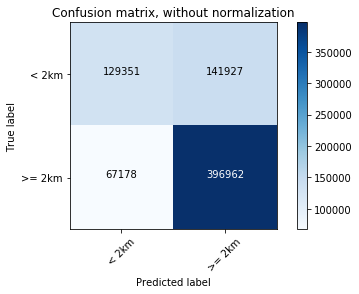

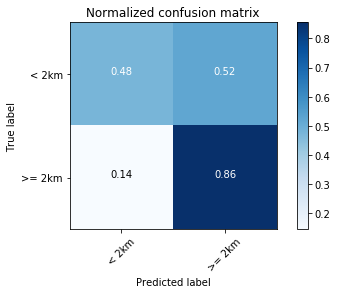

In [27]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['< 2km', '>= 2km'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['< 2km', '>= 2km'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Xgboost Model

In [28]:
import xgboost as xgb

In [29]:
a = pd.concat([X_train, pd.DataFrame({'distance': y_train}, index=X_train.index)], axis=1, ignore_index=True)

In [30]:
%%time
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)
watchlist = [(dtrain,'train'), (dvalid,'eval')]

CPU times: user 1.44 s, sys: 1.61 s, total: 3.05 s
Wall time: 3.05 s


In [31]:
xparams = {'objective':'binary:logistic',
            'eval_metric': 'logloss',
            'eta': .05,
            'max_depth':7,
            'silent':0,
            'predictor': 'cpu_predictor'}

%time clf = xgb.train(xparams, dtrain, 2000, watchlist, verbose_eval=1)

[0]	train-logloss:0.68557	eval-logloss:0.68558
[1]	train-logloss:0.678732	eval-logloss:0.678758
[2]	train-logloss:0.672472	eval-logloss:0.672509
[3]	train-logloss:0.666803	eval-logloss:0.666858
[4]	train-logloss:0.661559	eval-logloss:0.66163
[5]	train-logloss:0.656706	eval-logloss:0.656788
[6]	train-logloss:0.652309	eval-logloss:0.652398
[7]	train-logloss:0.648384	eval-logloss:0.648485
[8]	train-logloss:0.644748	eval-logloss:0.644849
[9]	train-logloss:0.64131	eval-logloss:0.641413
[10]	train-logloss:0.638226	eval-logloss:0.63834
[11]	train-logloss:0.635361	eval-logloss:0.635486
[12]	train-logloss:0.632791	eval-logloss:0.632926
[13]	train-logloss:0.630483	eval-logloss:0.63063
[14]	train-logloss:0.627948	eval-logloss:0.628098
[15]	train-logloss:0.625632	eval-logloss:0.625788
[16]	train-logloss:0.623489	eval-logloss:0.623656
[17]	train-logloss:0.621535	eval-logloss:0.62171
[18]	train-logloss:0.619736	eval-logloss:0.619923
[19]	train-logloss:0.618193	eval-logloss:0.618391
[20]	train-loglos

[164]	train-logloss:0.585763	eval-logloss:0.587577
[165]	train-logloss:0.585725	eval-logloss:0.587552
[166]	train-logloss:0.585663	eval-logloss:0.587497
[167]	train-logloss:0.585612	eval-logloss:0.587453
[168]	train-logloss:0.585553	eval-logloss:0.587406
[169]	train-logloss:0.585461	eval-logloss:0.587321
[170]	train-logloss:0.585338	eval-logloss:0.587214
[171]	train-logloss:0.585311	eval-logloss:0.58719
[172]	train-logloss:0.585287	eval-logloss:0.587174
[173]	train-logloss:0.58522	eval-logloss:0.587116
[174]	train-logloss:0.58512	eval-logloss:0.58702
[175]	train-logloss:0.58509	eval-logloss:0.586998
[176]	train-logloss:0.585021	eval-logloss:0.586933
[177]	train-logloss:0.58487	eval-logloss:0.58679
[178]	train-logloss:0.584731	eval-logloss:0.586658
[179]	train-logloss:0.584671	eval-logloss:0.5866
[180]	train-logloss:0.584614	eval-logloss:0.586558
[181]	train-logloss:0.584451	eval-logloss:0.586408
[182]	train-logloss:0.584324	eval-logloss:0.586294
[183]	train-logloss:0.584273	eval-loglos

[326]	train-logloss:0.576539	eval-logloss:0.579925
[327]	train-logloss:0.576515	eval-logloss:0.579916
[328]	train-logloss:0.576505	eval-logloss:0.579912
[329]	train-logloss:0.576499	eval-logloss:0.579909
[330]	train-logloss:0.57647	eval-logloss:0.579892
[331]	train-logloss:0.576426	eval-logloss:0.579864
[332]	train-logloss:0.576356	eval-logloss:0.579806
[333]	train-logloss:0.576307	eval-logloss:0.579774
[334]	train-logloss:0.576298	eval-logloss:0.57977
[335]	train-logloss:0.576284	eval-logloss:0.579762
[336]	train-logloss:0.576267	eval-logloss:0.579759
[337]	train-logloss:0.576194	eval-logloss:0.579696
[338]	train-logloss:0.576166	eval-logloss:0.579675
[339]	train-logloss:0.576146	eval-logloss:0.579663
[340]	train-logloss:0.57614	eval-logloss:0.57966
[341]	train-logloss:0.576099	eval-logloss:0.579633
[342]	train-logloss:0.57603	eval-logloss:0.579576
[343]	train-logloss:0.576001	eval-logloss:0.579564
[344]	train-logloss:0.575976	eval-logloss:0.579551
[345]	train-logloss:0.575867	eval-lo

[488]	train-logloss:0.56971	eval-logloss:0.574698
[489]	train-logloss:0.569597	eval-logloss:0.574591
[490]	train-logloss:0.56953	eval-logloss:0.574536
[491]	train-logloss:0.569512	eval-logloss:0.574525
[492]	train-logloss:0.569504	eval-logloss:0.574521
[493]	train-logloss:0.569416	eval-logloss:0.57444
[494]	train-logloss:0.569404	eval-logloss:0.574435
[495]	train-logloss:0.569361	eval-logloss:0.574407
[496]	train-logloss:0.56926	eval-logloss:0.574312
[497]	train-logloss:0.569208	eval-logloss:0.574269
[498]	train-logloss:0.569138	eval-logloss:0.574212
[499]	train-logloss:0.569115	eval-logloss:0.5742
[500]	train-logloss:0.56907	eval-logloss:0.574165
[501]	train-logloss:0.56905	eval-logloss:0.574155
[502]	train-logloss:0.569046	eval-logloss:0.574154
[503]	train-logloss:0.569033	eval-logloss:0.574151
[504]	train-logloss:0.569014	eval-logloss:0.574148
[505]	train-logloss:0.568978	eval-logloss:0.574127
[506]	train-logloss:0.568961	eval-logloss:0.574122
[507]	train-logloss:0.568956	eval-loglo

[650]	train-logloss:0.564786	eval-logloss:0.571329
[651]	train-logloss:0.56477	eval-logloss:0.571319
[652]	train-logloss:0.564753	eval-logloss:0.571315
[653]	train-logloss:0.564719	eval-logloss:0.571293
[654]	train-logloss:0.564714	eval-logloss:0.571289
[655]	train-logloss:0.56468	eval-logloss:0.571269
[656]	train-logloss:0.564671	eval-logloss:0.571265
[657]	train-logloss:0.564668	eval-logloss:0.571264
[658]	train-logloss:0.564654	eval-logloss:0.571261
[659]	train-logloss:0.564642	eval-logloss:0.571259
[660]	train-logloss:0.564638	eval-logloss:0.571259
[661]	train-logloss:0.564622	eval-logloss:0.571255
[662]	train-logloss:0.564606	eval-logloss:0.57125
[663]	train-logloss:0.564597	eval-logloss:0.571246
[664]	train-logloss:0.564587	eval-logloss:0.571242
[665]	train-logloss:0.564581	eval-logloss:0.571242
[666]	train-logloss:0.564565	eval-logloss:0.57124
[667]	train-logloss:0.564549	eval-logloss:0.571237
[668]	train-logloss:0.56454	eval-logloss:0.571237
[669]	train-logloss:0.564525	eval-lo

[812]	train-logloss:0.561224	eval-logloss:0.569197
[813]	train-logloss:0.561217	eval-logloss:0.569195
[814]	train-logloss:0.561191	eval-logloss:0.569175
[815]	train-logloss:0.561166	eval-logloss:0.569162
[816]	train-logloss:0.561147	eval-logloss:0.569157
[817]	train-logloss:0.561135	eval-logloss:0.569155
[818]	train-logloss:0.56112	eval-logloss:0.569152
[819]	train-logloss:0.561103	eval-logloss:0.569148
[820]	train-logloss:0.561091	eval-logloss:0.569146
[821]	train-logloss:0.561073	eval-logloss:0.569135
[822]	train-logloss:0.561071	eval-logloss:0.569135
[823]	train-logloss:0.561053	eval-logloss:0.569131
[824]	train-logloss:0.56103	eval-logloss:0.56912
[825]	train-logloss:0.561016	eval-logloss:0.569116
[826]	train-logloss:0.560998	eval-logloss:0.569112
[827]	train-logloss:0.560936	eval-logloss:0.569061
[828]	train-logloss:0.560922	eval-logloss:0.569058
[829]	train-logloss:0.560887	eval-logloss:0.569032
[830]	train-logloss:0.560847	eval-logloss:0.569006
[831]	train-logloss:0.560812	eval-

[974]	train-logloss:0.557316	eval-logloss:0.566742
[975]	train-logloss:0.557297	eval-logloss:0.56674
[976]	train-logloss:0.557283	eval-logloss:0.566732
[977]	train-logloss:0.557273	eval-logloss:0.566729
[978]	train-logloss:0.557266	eval-logloss:0.566728
[979]	train-logloss:0.557258	eval-logloss:0.566727
[980]	train-logloss:0.557254	eval-logloss:0.566727
[981]	train-logloss:0.557245	eval-logloss:0.566726
[982]	train-logloss:0.557232	eval-logloss:0.566722
[983]	train-logloss:0.5572	eval-logloss:0.566699
[984]	train-logloss:0.557168	eval-logloss:0.566679
[985]	train-logloss:0.557148	eval-logloss:0.566675
[986]	train-logloss:0.557125	eval-logloss:0.566659
[987]	train-logloss:0.55711	eval-logloss:0.566652
[988]	train-logloss:0.557097	eval-logloss:0.566647
[989]	train-logloss:0.557068	eval-logloss:0.566628
[990]	train-logloss:0.557053	eval-logloss:0.566625
[991]	train-logloss:0.557046	eval-logloss:0.566624
[992]	train-logloss:0.557005	eval-logloss:0.566591
[993]	train-logloss:0.557002	eval-l

[1133]	train-logloss:0.554603	eval-logloss:0.565392
[1134]	train-logloss:0.554595	eval-logloss:0.565388
[1135]	train-logloss:0.554577	eval-logloss:0.565376
[1136]	train-logloss:0.554516	eval-logloss:0.565327
[1137]	train-logloss:0.554503	eval-logloss:0.565328
[1138]	train-logloss:0.554489	eval-logloss:0.565326
[1139]	train-logloss:0.554483	eval-logloss:0.565327
[1140]	train-logloss:0.554481	eval-logloss:0.565326
[1141]	train-logloss:0.554451	eval-logloss:0.56531
[1142]	train-logloss:0.554408	eval-logloss:0.565278
[1143]	train-logloss:0.554392	eval-logloss:0.565272
[1144]	train-logloss:0.55438	eval-logloss:0.565271
[1145]	train-logloss:0.554354	eval-logloss:0.565258
[1146]	train-logloss:0.554323	eval-logloss:0.565239
[1147]	train-logloss:0.554302	eval-logloss:0.56523
[1148]	train-logloss:0.554281	eval-logloss:0.565222
[1149]	train-logloss:0.554261	eval-logloss:0.565208
[1150]	train-logloss:0.554246	eval-logloss:0.565205
[1151]	train-logloss:0.554213	eval-logloss:0.565184
[1152]	train-lo

[1292]	train-logloss:0.551346	eval-logloss:0.563513
[1293]	train-logloss:0.551332	eval-logloss:0.563511
[1294]	train-logloss:0.551314	eval-logloss:0.563505
[1295]	train-logloss:0.551304	eval-logloss:0.563504
[1296]	train-logloss:0.551289	eval-logloss:0.563501
[1297]	train-logloss:0.551279	eval-logloss:0.563501
[1298]	train-logloss:0.551253	eval-logloss:0.563484
[1299]	train-logloss:0.551243	eval-logloss:0.563486
[1300]	train-logloss:0.551227	eval-logloss:0.563482
[1301]	train-logloss:0.551215	eval-logloss:0.563482
[1302]	train-logloss:0.551196	eval-logloss:0.563475
[1303]	train-logloss:0.55119	eval-logloss:0.563475
[1304]	train-logloss:0.551173	eval-logloss:0.563472
[1305]	train-logloss:0.551144	eval-logloss:0.563454
[1306]	train-logloss:0.551127	eval-logloss:0.563449
[1307]	train-logloss:0.551121	eval-logloss:0.563449
[1308]	train-logloss:0.551118	eval-logloss:0.563449
[1309]	train-logloss:0.551107	eval-logloss:0.563448
[1310]	train-logloss:0.551094	eval-logloss:0.563446
[1311]	train-

[1451]	train-logloss:0.54884	eval-logloss:0.562383
[1452]	train-logloss:0.548788	eval-logloss:0.562344
[1453]	train-logloss:0.548753	eval-logloss:0.56232
[1454]	train-logloss:0.548736	eval-logloss:0.562318
[1455]	train-logloss:0.54868	eval-logloss:0.562274
[1456]	train-logloss:0.548659	eval-logloss:0.562266
[1457]	train-logloss:0.548629	eval-logloss:0.562247
[1458]	train-logloss:0.548625	eval-logloss:0.562246
[1459]	train-logloss:0.548605	eval-logloss:0.562237
[1460]	train-logloss:0.548591	eval-logloss:0.562234
[1461]	train-logloss:0.548583	eval-logloss:0.562234
[1462]	train-logloss:0.548573	eval-logloss:0.562234
[1463]	train-logloss:0.548556	eval-logloss:0.562233
[1464]	train-logloss:0.548532	eval-logloss:0.562218
[1465]	train-logloss:0.548521	eval-logloss:0.562217
[1466]	train-logloss:0.54848	eval-logloss:0.56219
[1467]	train-logloss:0.54847	eval-logloss:0.562189
[1468]	train-logloss:0.54846	eval-logloss:0.562187
[1469]	train-logloss:0.548446	eval-logloss:0.562187
[1470]	train-loglos

[1610]	train-logloss:0.545882	eval-logloss:0.560871
[1611]	train-logloss:0.54588	eval-logloss:0.56087
[1612]	train-logloss:0.545875	eval-logloss:0.56087
[1613]	train-logloss:0.545867	eval-logloss:0.560869
[1614]	train-logloss:0.545846	eval-logloss:0.560858
[1615]	train-logloss:0.545835	eval-logloss:0.560856
[1616]	train-logloss:0.545831	eval-logloss:0.560857
[1617]	train-logloss:0.545803	eval-logloss:0.560839
[1618]	train-logloss:0.545792	eval-logloss:0.560839
[1619]	train-logloss:0.54576	eval-logloss:0.560812
[1620]	train-logloss:0.545719	eval-logloss:0.560781
[1621]	train-logloss:0.545708	eval-logloss:0.560777
[1622]	train-logloss:0.545676	eval-logloss:0.560753
[1623]	train-logloss:0.545663	eval-logloss:0.56075
[1624]	train-logloss:0.545662	eval-logloss:0.560751
[1625]	train-logloss:0.545637	eval-logloss:0.560734
[1626]	train-logloss:0.545622	eval-logloss:0.560726
[1627]	train-logloss:0.545595	eval-logloss:0.560708
[1628]	train-logloss:0.545565	eval-logloss:0.560686
[1629]	train-logl

[1769]	train-logloss:0.543515	eval-logloss:0.559819
[1770]	train-logloss:0.543478	eval-logloss:0.559791
[1771]	train-logloss:0.543474	eval-logloss:0.559792
[1772]	train-logloss:0.543466	eval-logloss:0.559791
[1773]	train-logloss:0.543431	eval-logloss:0.559769
[1774]	train-logloss:0.543416	eval-logloss:0.559763
[1775]	train-logloss:0.543404	eval-logloss:0.55976
[1776]	train-logloss:0.543392	eval-logloss:0.559757
[1777]	train-logloss:0.543378	eval-logloss:0.559754
[1778]	train-logloss:0.543344	eval-logloss:0.559731
[1779]	train-logloss:0.543303	eval-logloss:0.559698
[1780]	train-logloss:0.543298	eval-logloss:0.559695
[1781]	train-logloss:0.543275	eval-logloss:0.559682
[1782]	train-logloss:0.543265	eval-logloss:0.559682
[1783]	train-logloss:0.543214	eval-logloss:0.55964
[1784]	train-logloss:0.543208	eval-logloss:0.559639
[1785]	train-logloss:0.543204	eval-logloss:0.559638
[1786]	train-logloss:0.543189	eval-logloss:0.559636
[1787]	train-logloss:0.543173	eval-logloss:0.559632
[1788]	train-l

[1928]	train-logloss:0.541409	eval-logloss:0.559053
[1929]	train-logloss:0.541397	eval-logloss:0.559051
[1930]	train-logloss:0.54138	eval-logloss:0.559047
[1931]	train-logloss:0.541374	eval-logloss:0.559046
[1932]	train-logloss:0.541368	eval-logloss:0.559045
[1933]	train-logloss:0.541364	eval-logloss:0.559045
[1934]	train-logloss:0.541357	eval-logloss:0.559043
[1935]	train-logloss:0.541311	eval-logloss:0.559008
[1936]	train-logloss:0.541308	eval-logloss:0.559007
[1937]	train-logloss:0.54129	eval-logloss:0.558993
[1938]	train-logloss:0.54128	eval-logloss:0.558992
[1939]	train-logloss:0.541276	eval-logloss:0.558992


KeyboardInterrupt: 

In [32]:
clf.save_model('xgb_model')

NameError: name 'clf' is not defined

# Save Data

In [ ]:
df.to_csv("./input/readyData.csv")

## Grid Search Model Parameters

In [90]:
from sklearn.model_selection import GridSearchCV

In [89]:
# create input data
X_train, y_train = generate_model_input(train)
X_valid, y_valid = generate_model_input(validation)
X_test, y_test = generate_model_input(test)

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [92]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'num_boost_round': 1000,
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_bin': 512,
    'lambda_l2': .05,
    'num_threads':8
}

param_grid = {
    'boosting_type': ['gbdt'],
    'objective': ['binary'],
    'metric': ['binary_logloss'],
    'num_boost_round': [10],
    'learning_rate': [.05],
    'num_leaves': [30, 50],
    'max_bin': [255],
    'lambda_l2': [.05],
    'num_threads': [8]
}

In [93]:
mod = lgb.LGBMRegressor(boosting_type=params['boosting_type'],
                        objective=params['objective'],
                        metric=params['metric'],
                        num_boost_round=params['num_boost_round'],
                        learning_rate=params['learning_rate'],
                        num_leaves=params['num_leaves'],
                        max_bin=params['max_bin'],
                        lambda_l2=params['lambda_l2'],
                        num_threads=params['num_threads']
                       )

In [94]:
%%time
print('CV training start...')
grid = GridSearchCV(mod, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

CV training start...


/usr/local/lib/python3.5/dist-packages/lightgbm/engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.5/dist-packages/lightgbm/engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.5/dist-packages/lightgbm/engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.5/dist-packages/lightgbm/engine.py:99: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.5/dist-packages/lightgbm/engine.py:99: UserWarning: Found `nu

KeyboardInterrupt: 